In [182]:
import numpy as np
from cv2 import cv2
import matplotlib.pyplot as plt

In [183]:
def binarise(im,thres):
    height=im.shape[0]
    width=im.shape[1]
    res=np.empty(im.shape,np.uint8)
    for h in range(height):
        for w in range(width):
            if im[h,w]<=thres:
                res[h,w]=0
            else:
                res[h,w]=1
    return res

In [184]:
def linContrastStretchin(im,a,b):
    if len(im.shape)==3:
        channels=im.shape[2]
    else:
        channels=1
    b=np.array([b]*channels)
    a=np.array([a]*channels)
    min_px=im.min(axis=(0,1))
    max_px=im.max(axis=(0,1))
    temp=((b-a)/(max_px-min_px))*(im-min_px)+a
    temp=temp.astype(int)
    return temp

In [185]:
def dise_output(dice_img,blur_size,mor_size):
    dice_img=cv2.blur(dice_img,(blur_size,blur_size))
    bimg=binarise(dice_img,100)
    bb=linContrastStretchin(bimg,0,255)
    cv2.imwrite('wri.jpeg',bb)
    kernel=np.ones((mor_size,mor_size),np.uint8)
    bimg=cv2.morphologyEx(bimg, cv2.MORPH_CLOSE,kernel)
    bimg=cv2.morphologyEx(bimg,cv2.MORPH_OPEN,kernel)
    bb=linContrastStretchin(bimg,0,255)
    cv2.imwrite('wri_after.jpeg',bb)
    ret, labels = cv2.connectedComponents(bimg)
    return ret-2

In [186]:
dice_img=cv2.imread('d3.jpeg',cv2.IMREAD_GRAYSCALE)


In [187]:
print(dise_output(dice_img,5,7))

3


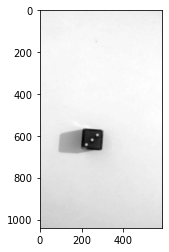

In [188]:
dice_img=cv2.blur(dice_img,(5,5))
plt.imshow(dice_img,cmap='gray')

In [189]:
bimg=binarise(dice_img,100)

In [190]:
kernel =np.ones((7,7),np.uint8)


In [191]:
print(kernel)

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


In [192]:
bimg=cv2.morphologyEx(bimg, cv2.MORPH_CLOSE,kernel)
bimg=cv2.morphologyEx(bimg,cv2.MORPH_OPEN,kernel)

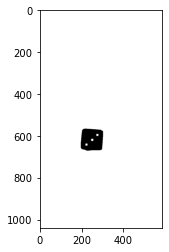

In [193]:
plt.imshow(bimg,cmap='gray')

In [194]:
ret, labels = cv2.connectedComponents(bimg)

In [195]:
print('the roll in dice is ',ret-2)

the roll in dice is  3


In [196]:
bb=linContrastStretchin(bimg,0,255)
cv2.imwrite('wri.jpeg',bb)

True

In [197]:
#here on we are starting with the video thing.
mylist=[0]*10
count=0
cap = cv2.VideoCapture('thevid.mp4')
while cap.isOpened():
    ret,frame=cap.read()
    if not ret:
        print('not able to recive frame')
        break
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray)
    mylist[count]=gray
    count=(count+1)%10
    if cv2.waitKey(30) == ord('q'):
        break
    if count==9:
        break
cap.release()
cv2.destroyAllWindows()
    

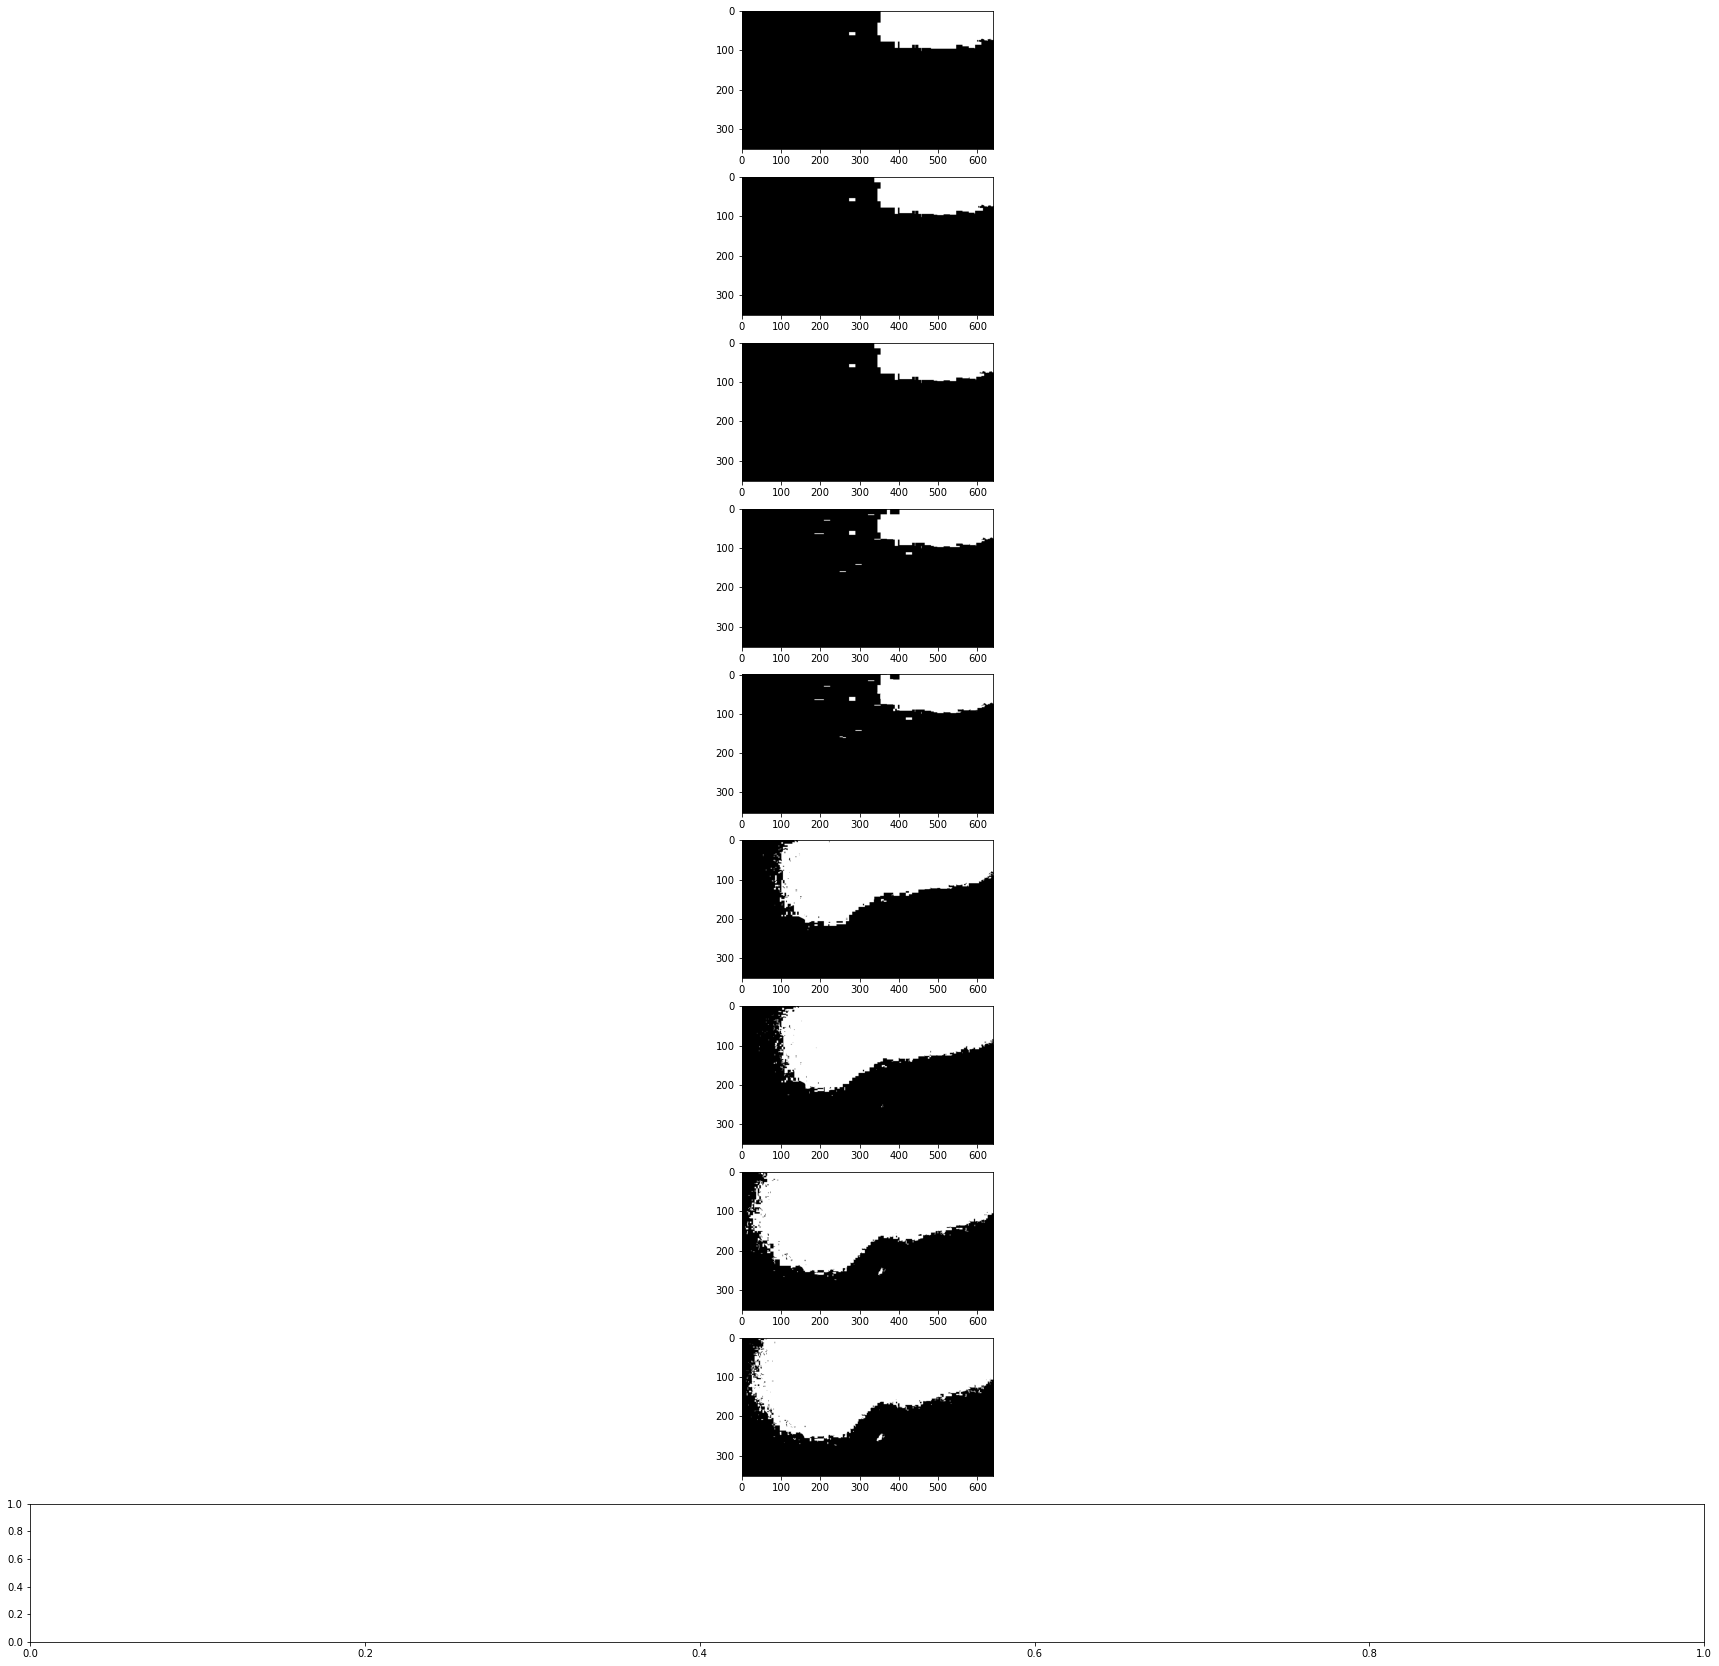

In [198]:
fig,arr=plt.subplots(10,figsize=(30,30))
for i in range(9):
    arr[i].imshow(binarise(mylist[i],100),cmap='gray')

In [222]:
#important piece of code.
prev=0
first_time=True
fs=True
cap = cv2.VideoCapture('thevid.mp4')
error_rate=[]
result_array=[]
frame_count=0
while cap.isOpened():
    if fs:
        for i in range(300):
            ret,frame=cap.read()
        fs=False
    else:
        ret,frame=cap.read()
    if not ret:
        print('not able to recive frame')
        break
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if first_time:
        prev=gray
        first_time=False
    else:
        diff_rate=np.square(np.subtract(prev,gray)).mean()
        error_rate.append(diff_rate)
        if(diff_rate<=3):
            result_array.append(dise_output(gray,2,2))
            break
        prev=gray
    if cv2.waitKey(30) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

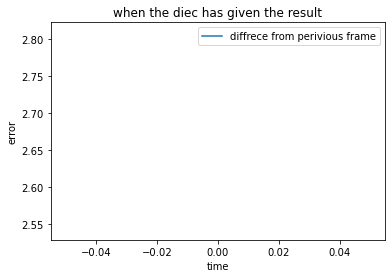

In [223]:
plt.plot(range(len(error_rate)),error_rate, label = 'diffrece from perivious frame')
plt.xlabel('time') 
plt.ylabel('error') 
plt.title('when the diec has given the result') 
plt.legend() 
plt.show() 

In [224]:
print(result_array)

[3]


In [202]:
#counting number of frames in the video
cap = cv2.VideoCapture('thevid.mp4')
count=0
while cap.isOpened():
    ret,frame=cap.read()
    count+=1
    if not ret:
        break

In [203]:
print(count)

643
